In [16]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sales = pd.read_csv('top100videogamesales.csv')

In [9]:
sales.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


1)Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales. 

Text(0.5, 1.0, 'Regional Sales by Publisher')

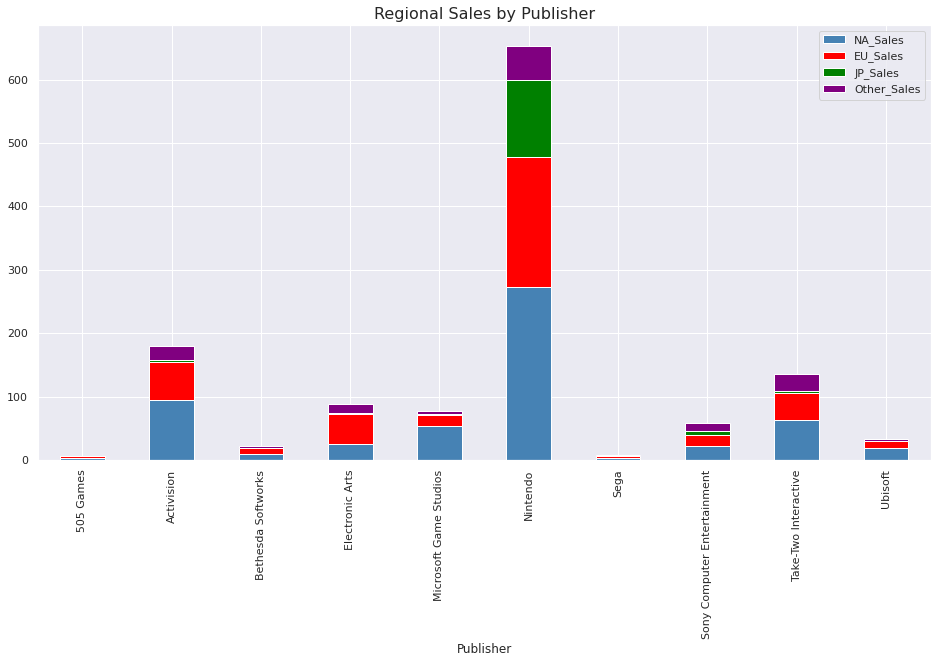

In [24]:
#Create new pandas dataframe 
sales_by_region = sales[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df2 = sales_by_region.groupby(['Publisher']).sum()
#changes the publisher index back into a column rather than being an index
df3=df2.reset_index()
df3.set_index('Publisher').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green', 'purple'])
#add overall title
plt.title('Regional Sales by Publisher', fontsize=16)


I created this chart by first creating a separate dataframe where the sales for each region was grouped by the publisher. I then used the set_index() function to create a stacked bar plot which shows that Nintendo had the most sales. Sega and 505 Games had the least sales. 

2) Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

Text(0.5, 1.0, 'Global Sales by Year')

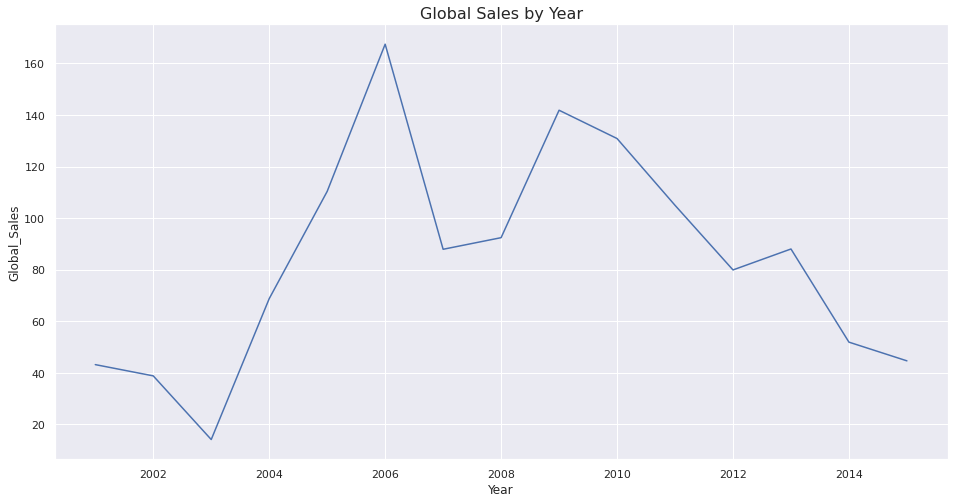

In [30]:
sales_per_year = sales[['Year','Global_Sales']]
sales_per_year = sales_per_year.groupby(['Year']).sum().reset_index()
sns.lineplot(data=sales_per_year,x='Year',y='Global_Sales')
plt.title('Global Sales by Year', fontsize=16)

To create this line graph, I first created a separate dataframe with just the Year information and global sales information from the sales dataframe. Then grouped the global sales by the years and put the summary of that information into another dataset. I then used this dataset to plot the line chart above. The results from the chart show that global sales increased drastically between 2003 and 2004 where they reached their peak. But then sales decreased in 2007 and then increased but then steadily declined from 2009. 

3) Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

Text(0.5, 0, 'Global Sales')

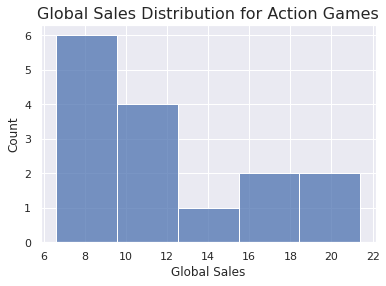

In [7]:
#Dataframe with sales where the genre was 'action'
action_sales = sales.loc[sales['Genre']=='Action']

sns.histplot(data=action_sales, x = 'Global_Sales')
plt.title('Global Sales Distribution for Action Games', fontsize=16)
plt.xlabel('Global Sales')

To create this histogram, I first created a separate dataframe that had all the sales where the genre was 'Action'. Then I used sns.histplot() to create a histogram to illustrate the distribution of the global sales where the genre was 'Action'.  The chart shows that most global sales are between 7 and 10, and the minority of the sales are between 13 and 16.  

4) North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

In [35]:
sales_NA = sales[['Genre','NA_Sales']]
sales_NA= sales_NA.groupby(['Genre']).sum().reset_index().sort_values(by='NA_Sales',ascending=False)
sales_NA
#Next steps - put the top 5 into a new data set. Summarize the values of the other one an then add a new entry to the previous dataset called "Other"
#sales_NA.plot.pie(y='NA_Sales', figsize=(10, 10))
#plt.title('North American Sales by Genre', fontsize=16)


,Genre,NA_Sales
7,Shooter,140.44
9,Sports,84.87
0,Action,77.81
2,Misc,70.60
5,Racing,56.45
3,Platform,52.67
6,Role-Playing,50.48
8,Simulation,14.61
1,Fighting,14.40
4,Puzzle,3.44
